In [76]:
import pandas as pd
import numpy as np
from numpy.random import seed
import statistics

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
seed(100)

In [78]:
df = pd.read_csv('./DATA/online_transaction_dataset_processed.csv')
attr = df.columns.tolist()
np.transpose(attr)

array(['Unnamed: 0', 'Administrative', 'Administrative_Duration',
       'Informational', 'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='<U23')

In [79]:
df.head()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,9,1,1,1,1,0,0,0
1,1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,9,2,2,1,2,0,0,0
2,3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,9,3,2,2,4,0,0,0
3,4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,9,3,3,1,4,0,1,0
4,5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,9,2,2,1,3,0,0,0


In [80]:
df['Revenue'].value_counts()

Revenue
0    10375
1     1908
Name: count, dtype: int64

In [81]:
df['Month'].value_counts()

Month
0    3357
1    2995
2    1884
3    1727
4     549
5     448
6     433
7     431
8     288
9     171
Name: count, dtype: int64

In [82]:
df[attr[1:len(attr)]].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,9,1,1,1,1,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,9,2,2,1,2,0,0,0
2,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,9,3,2,2,4,0,0,0
3,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,9,3,3,1,4,0,1,0
4,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,9,2,2,1,3,0,0,0


In [83]:
np.transpose(attr[1:len(attr)]), attr[len(attr)-1]

(array(['Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated',
        'ProductRelated_Duration', 'BounceRates', 'ExitRates',
        'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
        'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
       dtype='<U23'),
 'Revenue')

In [84]:
df[attr[len(attr)-1]].value_counts()

Revenue
0    10375
1     1908
Name: count, dtype: int64

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [86]:
x_tr, x_t, y_tr, y_t = train_test_split(df[attr[1:len(attr)-1]], df['Revenue'], test_size=0.4, random_state=100)

In [87]:
x_tr.shape, x_t.shape, y_tr.shape, y_t.shape

((7983, 17), (4300, 17), (7983,), (4300,))

In [88]:
clf = GradientBoostingClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)

In [89]:
print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3655
           1       0.71      0.60      0.65       645

    accuracy                           0.90      4300
   macro avg       0.82      0.78      0.80      4300
weighted avg       0.90      0.90      0.90      4300



In [90]:
print(confusion_matrix(y_t, y_p))

[[3493  162]
 [ 255  390]]


In [91]:
clf_prob = clf.predict_proba(x_t)

In [92]:
clf_probability = clf_prob[:,1]
clf_probability

array([0.6838667 , 0.02350111, 0.01776724, ..., 0.02511935, 0.04496902,
       0.64242981])

In [93]:
df_prob = pd.DataFrame({'clf_prob': clf_probability})

In [94]:
df_prob['clf_prob'].value_counts()

clf_prob
0.004987    74
0.009808    69
0.023501    66
0.011114    50
0.007217    35
            ..
0.055122     1
0.674810     1
0.023502     1
0.027035     1
0.034855     1
Name: count, Length: 2682, dtype: int64

In [95]:
clf_fpr, clf_tpr, _ = roc_curve(y_t, clf_probability)  
nc_fpr, nc_trp, _ = roc_curve(y_t, np.zeros(len(y_t)))

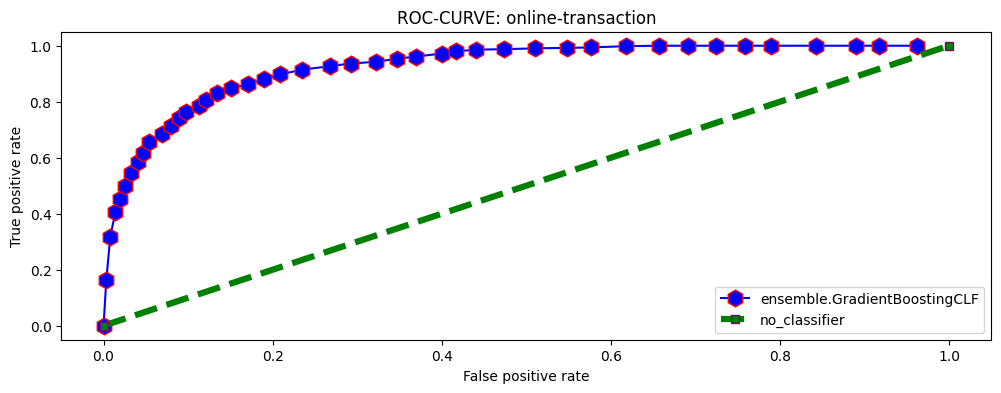

In [96]:
plt.figure(figsize=(12,4))
plt.plot(clf_fpr[::25], clf_tpr[::25], 
         color='blue', label='ensemble.GradientBoostingCLF',
         marker='h', markeredgecolor='red',
         markersize=12)
plt.plot(nc_fpr, nc_trp, 
         color='green', label='no_classifier',
         marker='s', markeredgecolor='purple',
         linestyle='--', linewidth=4.5)
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC-CURVE: online-transaction')
plt.show()

In [97]:
df_p = pd.DataFrame({'y_t': y_t, 'y_p': y_p})

In [98]:
df_p['y_t'].value_counts()

y_t
0    3655
1     645
Name: count, dtype: int64

In [99]:
print(confusion_matrix(y_t, y_p))

[[3493  162]
 [ 255  390]]


In [100]:
recall = confusion_matrix(y_t, y_p)[1][1]/(confusion_matrix(y_t, y_p)[1][1]+confusion_matrix(y_t, y_p)[1][0])
np.round(recall, 2)

0.6

In [101]:
precision = confusion_matrix(y_t, y_p)[1][1]/(confusion_matrix(y_t, y_p)[1][1]+confusion_matrix(y_t, y_p)[0][1])
precision

0.7065217391304348

In [102]:
f1_score = statistics.harmonic_mean([recall,precision])
np.round(f1_score, 2)

0.65

In [103]:
print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3655
           1       0.71      0.60      0.65       645

    accuracy                           0.90      4300
   macro avg       0.82      0.78      0.80      4300
weighted avg       0.90      0.90      0.90      4300



In [104]:
AREA_ROC = np.trapz(clf_tpr, clf_fpr)
AREA_ROC

0.9270070732457396

In [105]:
print('Area under the ROC_CURVE : ', AREA_ROC)

Area under the ROC_CURVE :  0.9270070732457396
